#Exploring Weather Trends

### SQL Queries


SELECT * FROM City_Data 
WHERE city = 'Long Beach' and country = 'United States'

SELECT * FROM global_data
ORDER BY Year

In [4]:
import pandas as pd

In [5]:
cityDF = pd.read_csv('C:\\Users\\chris\\JupyterNotebook\\Udacity Nanodegree\\Exploring Weather Trends\\cityresults.csv')
globalDF = pd.read_csv('C:\\Users\\chris\\JupyterNotebook\\Udacity Nanodegree\\Exploring Weather Trends\\globalresults.csv')

In [17]:
cityDF


,year,city,country,avg_temp
0,1849,Long Beach,United States,16.03
1,1850,Long Beach,United States,15.55
2,1851,Long Beach,United States,15.66
3,1852,Long Beach,United States,16.06
4,1853,Long Beach,United States,16.69
...,...,...,...,...
160,2009,Long Beach,United States,17.03
161,2010,Long Beach,United States,16.19
162,2011,Long Beach,United States,16.26
163,2012,Long Beach,United States,17.20


In [16]:
globalDF

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47
...,...,...
261,2011,9.52
262,2012,9.51
263,2013,9.61
264,2014,9.57


In [6]:
print(pd.merge(globalDF,cityDF[['year','avg_temp']], how='inner', on='year', suffixes=('global','city')))
comparisontable = pd.merge(globalDF,cityDF[['year','avg_temp']], how='inner', on='year', suffixes=('global','city'))

     year  avg_tempglobal  avg_tempcity
0    1849            7.98         16.03
1    1850            7.90         15.55
2    1851            8.18         15.66
3    1852            8.10         16.06
4    1853            8.04         16.69
..    ...             ...           ...
160  2009            9.51         17.03
161  2010            9.70         16.19
162  2011            9.52         16.26
163  2012            9.51         17.20
164  2013            9.61         17.18

[165 rows x 3 columns]


In [14]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

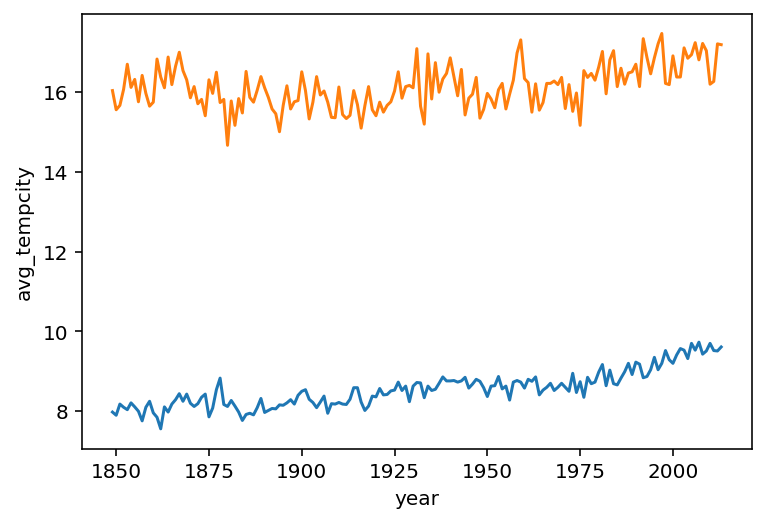

In [15]:
sns.lineplot(data=comparisontable,x='year',y='avg_tempglobal')
sns.lineplot(data=comparisontable,x='year',y='avg_tempcity')


In [47]:
globalma5 = comparisontable.avg_tempglobal.rolling(window=5).mean()
cityma5 = comparisontable.avg_tempcity.rolling(window=5).mean()
comparisontable['global5YRMA'] = globalma5
comparisontable['city5YRMA'] = cityma5

In [45]:
#comparisontable.drop(columns='ma5',inplace=True)

In [48]:
comparisontable

,year,avg_tempglobal,avg_tempcity,global5YRMA,city5YRMA
0,1849,7.98,16.03,NaN,NaN
1,1850,7.90,15.55,NaN,NaN
2,1851,8.18,15.66,NaN,NaN
3,1852,8.10,16.06,NaN,NaN
4,1853,8.04,16.69,8.040,15.998
...,...,...,...,...,...
160,2009,9.51,17.03,9.580,17.040
161,2010,9.70,16.19,9.580,16.892
162,2011,9.52,16.26,9.578,16.698
163,2012,9.51,17.20,9.534,16.778


<Figure size 720x720 with 0 Axes>

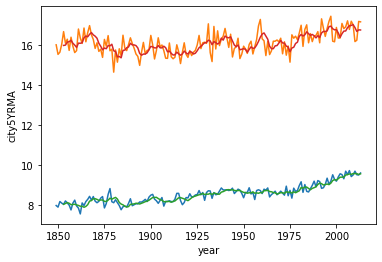

<Figure size 720x720 with 0 Axes>

In [62]:
sns.lineplot(data=comparisontable,x='year',y='avg_tempglobal')
sns.lineplot(data=comparisontable,x='year',y='avg_tempcity')

sns.lineplot(data=comparisontable,x='year',y='global5YRMA')
sns.lineplot(data=comparisontable,x='year',y='city5YRMA',legend='brief')

plt.figure(figsize=(10,10))

In [73]:
comparisontable

,year,avg_tempglobal,avg_tempcity,global5YRMA,city5YRMA
0,1849,7.98,16.03,NaN,NaN
1,1850,7.90,15.55,NaN,NaN
2,1851,8.18,15.66,NaN,NaN
3,1852,8.10,16.06,NaN,NaN
4,1853,8.04,16.69,8.040,15.998
...,...,...,...,...,...
160,2009,9.51,17.03,9.580,17.040
161,2010,9.70,16.19,9.580,16.892
162,2011,9.52,16.26,9.578,16.698
163,2012,9.51,17.20,9.534,16.778
